In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_LogProblem=pd.read_csv(r'/home/dorra/LogProblemP.csv')
df_InfoUser=pd.read_csv(r'/home/dorra/InfoUserP.csv')
df_InfoContent=pd.read_csv(r'/home/dorra/InfoContentP.csv')

In [3]:

student_grouped = df_LogProblem.groupby('uuid').agg({'is_correct': 'sum', 'total_attempt_cnt': 'sum'})

student_grouped['AAA'] = student_grouped['is_correct'] / student_grouped['total_attempt_cnt']

student_grouped.reset_index(inplace=True)

df_LogProblem = df_LogProblem.merge(student_grouped[['uuid', 'AAA']], on='uuid', how='left')


In [4]:
data = df_LogProblem[["AAA", "total_sec_taken"]]

In [11]:
x = data['AAA']
y = data['total_sec_taken']

In [17]:
x_array = x.to_numpy().reshape(-1, 1)
y_array = y.to_numpy().reshape(-1, 1)

print(x_array.shape)
print(y_array.shape)

(998040, 1)
(998040, 1)


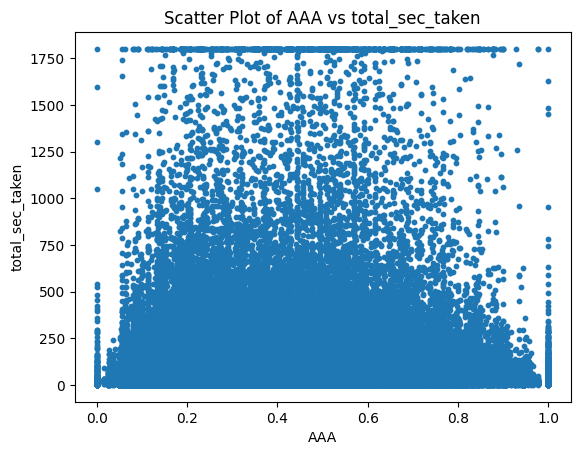

In [19]:
plt.scatter(x_array, y_array, marker='o', s=10)  
plt.xlabel('AAA')  
plt.ylabel('total_sec_taken')  
plt.title('Scatter Plot of AAA vs total_sec_taken')  
plt.show()  

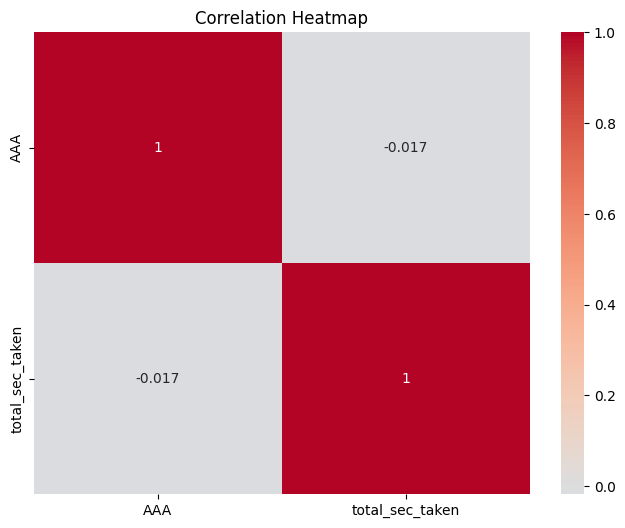

In [7]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()